#Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler


#Setting Seed for Reproducibility

In [ ]:
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(0)

# Generate a time-series data for temperature (e.g., daily data for 2 years)
days = 365 * 2
time = np.arange(days)
temperature = 30 + 10 * np.sin(2 * np.pi * time / 365) + np.random.normal(0, 2, days)  # adds yearly seasonality and some noise

# Put it in a DataFrame
data = pd.DataFrame({'day': time, 'temperature': temperature})


#Generating Synthetic Temperature Data


creating synthetic daily temperature data over two years, with seasonality (annual cycles) and noise, simulating real-world temperature fluctuations.

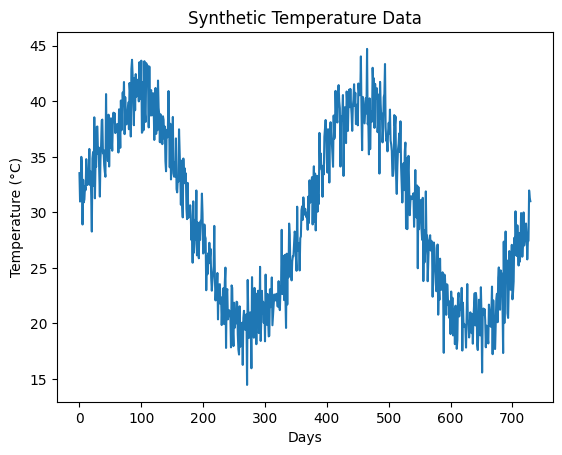

In [ ]:
import matplotlib.pyplot as plt

plt.plot(data['day'], data['temperature'])
plt.xlabel('Days')
plt.ylabel('Temperature (°C)')
plt.title('Synthetic Temperature Data')
plt.show()


#Data Normalizing

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the temperature data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['temperature']].values)


#Creating Sequences

In [ ]:
# Create sequences of 60 days (you can adjust this based on your preference)
def create_sequences(data, seq_length=60):
    sequences = []
    labels = []
    for i in range(seq_length, len(data)):
        sequences.append(data[i-seq_length:i])
        labels.append(data[i])
    return np.array(sequences), np.array(labels)

# Generate sequences and labels
X, y = create_sequences(scaled_data)


#Train-Test Split

In [ ]:
# Split into training and testing sets (80% training, 20% testing)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


#Defining and Training the LSTM Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

# Define the RNN model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - loss: 0.3746 - mae: 0.3746 - val_loss: 0.0723 - val_mae: 0.0723
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.1145 - mae: 0.1145 - val_loss: 0.1241 - val_mae: 0.1241
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0851 - mae: 0.0851 - val_loss: 0.0698 - val_mae: 0.0698
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0808 - mae: 0.0808 - val_loss: 0.0636 - val_mae: 0.0636
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0762 - mae: 0.0762 - val_loss: 0.0844 - val_mae: 0.0844
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.0741 - mae: 0.0741 - val_loss: 0.0608 - val_mae: 0.0608
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 0.0699 - mae: 0.0699 - val_loss: 0.0685 - val_mae: 0.0685
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 0.0761 - mae: 0.0761 - val_loss: 0.1004 - val_mae: 0.1004
Epoch 9/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0804 - mae: 0.

#Evaluating Model Performance

In [ ]:
# Evaluate on test set
test_mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {test_mae}")


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0532 - mae: 0.0532
Test MAE: [0.05648684874176979, 0.05648684874176979]


#Plotting Predictions vs. Actual Values

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step


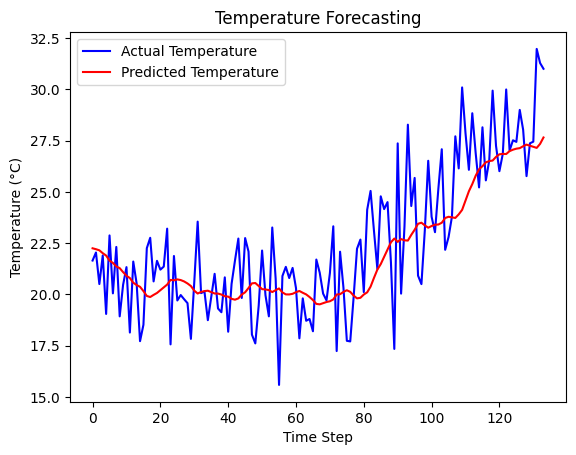

In [ ]:
# Make predictions on the test set
predicted = model.predict(X_test)

# Invert the scaling for the predictions and actual values
predicted = scaler.inverse_transform(predicted)
y_test_actual = scaler.inverse_transform(y_test)

# Plot the predictions and actual values
plt.plot(y_test_actual, color='blue', label='Actual Temperature')
plt.plot(predicted, color='red', label='Predicted Temperature')
plt.xlabel('Time Step')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.title('Temperature Forecasting')
plt.show()


#Defining a Conv1D + GRU Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Conv1D, Dropout

# Model using Conv1D, GRU, and adjusted units
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(GRU(units=60, return_sequences=True))  # Increased units
model.add(Dropout(0.3))  # Increased dropout for regularization
model.add(GRU(units=60))  # Increased units in second GRU layer
model.add(Dropout(0.3))
model.add(Dense(units=1))

# Compile and train as before
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mae'])
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 119ms/step - loss: 0.3759 - mae: 0.3759 - val_loss: 0.1139 - val_mae: 0.1139
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - loss: 0.1317 - mae: 0.1317 - val_loss: 0.0981 - val_mae: 0.0981
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.1020 - mae: 0.1020 - val_loss: 0.0716 - val_mae: 0.0716
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.0795 - mae: 0.0795 - val_loss: 0.0687 - val_mae: 0.0687
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 0.0768 - mae: 0.0768 - val_loss: 0.0593 - val_mae: 0.0593
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 124ms/step - loss: 0.0732 - mae: 0.0732 - val_loss: 0.0621 - val_mae: 0.0621
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - loss: 0.0732 - mae: 0.0732 - val_loss: 0.0697 - val_mae: 0.0697
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.0746 - mae: 0.0746 - val_loss: 0.0611 - val_mae: 0.0611
Epoch 9/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.0

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Conv1D, Dropout
from tensorflow.keras.callbacks import History

# Initialize dictionary to store results
results = {}

# List of model configurations to train and evaluate
model_configs = {
    "LSTM_model": {"layer_type": LSTM, "units": 50, "use_conv1d": False},
    "GRU_model": {"layer_type": GRU, "units": 50, "use_conv1d": False},
    "Conv1D_GRU_model": {"layer_type": GRU, "units": 60, "use_conv1d": True},
}

for model_name, config in model_configs.items():
    print(f"\nTraining {model_name}...\n")

    # Build the model based on the config
    model = Sequential()
    if config["use_conv1d"]:
        model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))

    model.add(config["layer_type"](units=config["units"], return_sequences=True if config["layer_type"] == LSTM else False))
    model.add(Dropout(0.3))

    if config["layer_type"] == LSTM:
        model.add(config["layer_type"](units=config["units"]))  # Second LSTM layer if LSTM model
        model.add(Dropout(0.3))

    model.add(Dense(units=1))

    # Compile and train the model
    model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mae'])
    history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

    # Evaluate on the test set
    test_mae = model.evaluate(X_test, y_test, verbose=0)[1]  # MAE is the second metric
    print(f"{model_name} Test MAE: {test_mae}")

    # Store validation MAE (minimum) and test MAE
    results[model_name] = {
        "min_val_mae": min(history.history['val_mae']),
        "test_mae": test_mae
    }



Training LSTM_model...

Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 89ms/step - loss: 0.3254 - mae: 0.3254 - val_loss: 0.0697 - val_mae: 0.0697
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.1104 - mae: 0.1104 - val_loss: 0.0726 - val_mae: 0.0726
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0923 - mae: 0.0923 - val_loss: 0.0914 - val_mae: 0.0914
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0910 - mae: 0.0910 - val_loss: 0.0688 - val_mae: 0.0688
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0877 - mae: 0.0877 - val_loss: 0.0728 - val_mae: 0.0728
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0802 - mae: 0.0802 - val_loss: 0.0608 - val_mae: 0.0608
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0762 - mae: 0.0762 - val_loss: 0.0605 - val_mae: 0.0605
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0867 - mae: 0.0867 - val_loss: 0.0585 - val_mae: 0.0585
Epoch 9/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1

In [ ]:
# Display the results
print("\nModel Performance Summary:\n")
for model_name, metrics in results.items():
    print(f"{model_name} -> Min Validation MAE: {metrics['min_val_mae']:.4f}, Test MAE: {metrics['test_mae']:.4f}")

# Find the best-performing model based on validation MAE
best_model = min(results, key=lambda x: results[x]["min_val_mae"])
print(f"\nBest Model: {best_model} with Min Validation MAE: {results[best_model]['min_val_mae']:.4f} and Test MAE: {results[best_model]['test_mae']:.4f}")



Model Performance Summary:

LSTM_model -> Min Validation MAE: 0.0563, Test MAE: 0.0558
GRU_model -> Min Validation MAE: 0.0606, Test MAE: 0.0563
Conv1D_GRU_model -> Min Validation MAE: 0.0615, Test MAE: 0.0559

Best Model: LSTM_model with Min Validation MAE: 0.0563 and Test MAE: 0.0558


#Model Performance Summary & Observations:

LSTM Model:
Min Validation MAE: 0.0563

Test MAE: 0.0558

Observation: The LSTM model demonstrated the best performance, with both the lowest validation and test MAE scores. This indicates that the LSTM model effectively captured time-series dependencies in the data, making it a strong model for forecasting.

GRU Model:
Min Validation MAE: 0.0606

Test MAE: 0.0563

Observation: The GRU model performed similarly to the LSTM model but with slightly higher MAE values. GRUs are generally computationally cheaper than LSTMs and work well in scenarios with shorter sequences, but in this case, the LSTM’s ability to handle longer dependencies better may have contributed to its superior performance.

Conv1D + GRU Model:
Min Validation MAE: 0.0615

Test MAE: 0.0559

Observation: The combination of Conv1D and GRU also performed well, achieving a close test MAE to the LSTM model. While the Conv1D layer helped in capturing local patterns in the time-series, it may not have been as effective as the LSTM in capturing longer dependencies, which could explain its slightly higher validation MAE.

#Conclusion

The LSTM model performed the best after testing different topologies; it had the lowest test and validation MAE scores. Because LSTMs can capture longer-term dependencies in time-series data, this implies that they are a good fit for the task. For this temperature forecasting assignment, the LSTM model would therefore be the best option.